##  Problem Definition
Based on the introduction the key challenge is to predict if an individual customer will churn or not. To accomplish that, machine learning models are trained based on 80% of the sample data. The remaining 20% are used to apply the trained models and assess their predictive power with regards to “churn / not churn”. A side question will be, which features actually drive customer churn. That information can be used to identify customer “pain points” and resolve them by providing goodies to make customers stay.
To compare models and select the best for this task, the accuracy is measured. Based on other characteristics of the data, for example the balance between classes (number of “churners” vs. “non-churners” in data set) further metrics are considered if needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset use telecom_churn :-  
df = pd.read_csv("telecom_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# To delete the unwanted columns CustomerID permanently from dataset df
df.drop("customerID",axis=1,inplace=True)

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df["TotalCharges"].value_counts()

           11
20.2       11
19.75       9
19.65       8
19.9        8
           ..
75.05       1
4533.9      1
2088.75     1
6563.4      1
2347.85     1
Name: TotalCharges, Length: 6531, dtype: int64

In [9]:
# Replace the space of df["TotalCharges"] with the null values permanently 
df["TotalCharges"].replace(" ",np.nan,inplace=True)

In [10]:
df["TotalCharges"].value_counts()

20.2       11
19.75       9
19.9        8
20.05       8
19.65       8
           ..
4533.9      1
2088.75     1
6563.4      1
57.2        1
2347.85     1
Name: TotalCharges, Length: 6530, dtype: int64

In [11]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df["TotalCharges"].dtype

dtype('O')

In [13]:
# To find the % of null values in TotalCharges columns
df["TotalCharges"].isnull().sum()*100/df.shape[0]

0.15618344455487718

In [14]:
# Change the type of TotalCharges column from object to float
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [15]:
df["TotalCharges"].dtype

dtype('float64')

In [16]:
# To fill null values of " TotalCharges " columns with mean of TotalCharges permanently 
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [17]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Label Encoding**

In [19]:
# Seperate all object type data and hold in df_Cat
df_cat = df.select_dtypes("object")
# Seperate all numeric type data and hold in df_num
df_num = df.select_dtypes(["float64","int64"])

In [20]:
# To converts obejct type data in to number using LabelEncoder class
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
  # Create object of LabelEncoder
  le=LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])


In [21]:
# Check the df_cat
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int32
 1   Partner           7043 non-null   int32
 2   Dependents        7043 non-null   int32
 3   PhoneService      7043 non-null   int32
 4   MultipleLines     7043 non-null   int32
 5   InternetService   7043 non-null   int32
 6   OnlineSecurity    7043 non-null   int32
 7   OnlineBackup      7043 non-null   int32
 8   DeviceProtection  7043 non-null   int32
 9   TechSupport       7043 non-null   int32
 10  StreamingTV       7043 non-null   int32
 11  StreamingMovies   7043 non-null   int32
 12  Contract          7043 non-null   int32
 13  PaperlessBilling  7043 non-null   int32
 14  PaymentMethod     7043 non-null   int32
 15  Churn             7043 non-null   int32
dtypes: int32(16)
memory usage: 440.3 KB


In [22]:
# To concatenate the df_cat and df_num into new Dataset
df_new = pd.concat([df_cat,df_num],axis=1)
df_new

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,1,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0,34,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,2,53.85,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,0,24,84.80,1990.50
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,0,72,103.20,7362.90
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,0,11,29.60,346.45
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,1,4,74.40,306.60


In [24]:
# train test split the dataset for training and testing
from sklearn.model_selection import train_test_split

In [25]:
# Selecting the Input and output from the datset
X = df_new.drop("Churn",axis=1) # input variable 
Y = df_new["Churn"]   # Output variable or target variable 

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

**Standardization**

In [27]:
# Only on Input columns if we performing the sampling technique, 
# but we performing the LinearRegression then apply on both input and output
from sklearn.preprocessing import StandardScaler



# fit_transform on training data X_train and transform on testing data X_test
# Create object of StandardScaler Class
ss = StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test) # here not training operation wouldn't perform, its only for testing
print("After Scaling training data : ")
print(X_train)
print("After scaling tesring data : ")
print(X_test)

After Scaling training data : 
[[ 0.99433652 -0.9528351  -0.64455136 ... -0.49748235  0.12975533
  -0.38003157]
 [-1.00569573  1.04949954  1.55146675 ...  1.49818033  1.29989652
   2.278386  ]
 [ 0.99433652  1.04949954 -0.64455136 ... -0.82330483  0.51980239
  -0.58545094]
 ...
 [ 0.99433652 -0.9528351  -0.64455136 ... -0.17165987  1.35798864
   0.30909311]
 [ 0.99433652 -0.9528351  -0.64455136 ... -1.23058292 -0.34494024
  -0.9540156 ]
 [-1.00569573  1.04949954  1.55146675 ... -0.66039359  0.11481736
  -0.5128709 ]]
After scaling tesring data : 
[[-1.00569573 -0.9528351  -0.64455136 ...  0.35780166  0.4998851
   0.45952092]
 [-1.00569573 -0.9528351  -0.64455136 ...  1.3759969   1.2484435
   1.84857022]
 [-1.00569573 -0.9528351  -0.64455136 ... -0.82330483 -0.65697789
  -0.77317162]
 ...
 [ 0.99433652 -0.9528351  -0.64455136 ... -0.45675454  1.06254873
  -0.10932763]
 [-1.00569573  1.04949954  1.55146675 ...  1.53890814 -0.21215826
   0.80882201]
 [-1.00569573 -0.9528351  -0.64455136 .

In [28]:
#BaseLine model : Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Base Line Model means use Logistic Regression(we predict yes/no values then 
#use classification algorithm)
from sklearn.linear_model import LogisticRegression

In [29]:
def create_model(model):
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  print(classification_report(Y_test,Y_pred))
  print("Confusion matrix")
  print(confusion_matrix(Y_test,Y_pred))
  return model

In [30]:
# Create the object of LogisticRegression class
lr= LogisticRegression()

In [31]:
# Call the function
lr = create_model(lr)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.63      0.59      0.61       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113

Confusion matrix
[[1401  184]
 [ 219  309]]


In [32]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

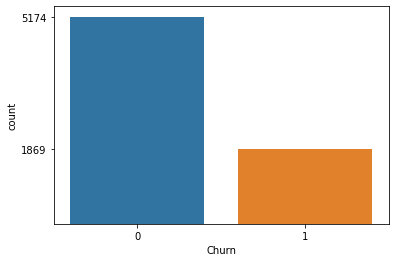

In [33]:
sns.countplot(data=df_new,x="Churn")
c = df["Churn"].value_counts()
plt.yticks(c)
plt.show()

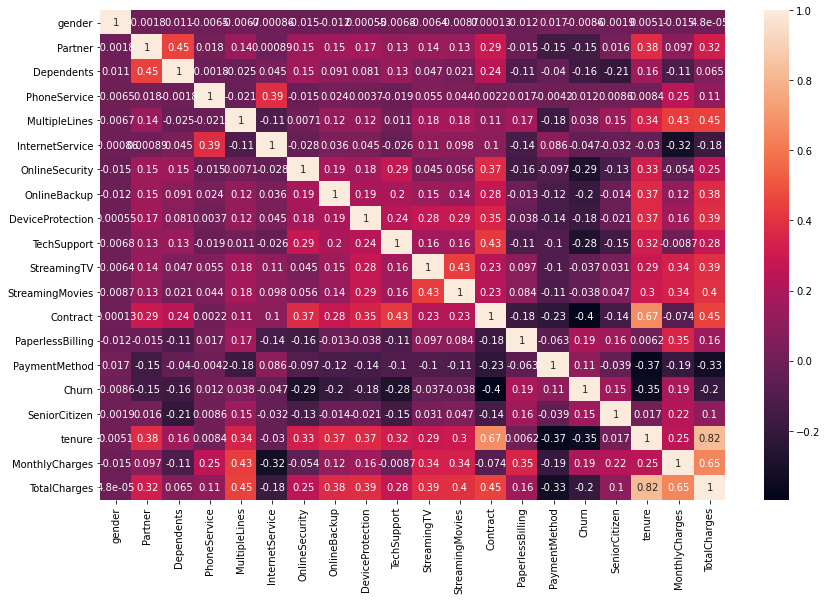

In [99]:
plt.figure(figsize = (14,9))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

data is not balance.


1.   If you have basicall reducing the majority class that is known as Random Undersampling.
2.   If you are increasing the minority class that is 
known as Random over sampling.




In [35]:
# First time install imbearn package
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

**Random Over Sampling**

In [36]:
# Use RnadomOverSampler
# Create Object of RandomOverSampler() class
ros = RandomOverSampler()

In [37]:
# RandomOverSampler method = fit_resample() inbuilt of RandomOverSampler
X_train1, Y_train1 = ros.fit_resample(X_train,Y_train)  # Increasing the " Yes " Record as Duplicate values.

In [38]:
# Before Apply RandomOverSampler() on training data
pd.Series(Y_train).value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [39]:
# After Applying RandomOverSampler() on training data
pd.Series(Y_train1).value_counts()

0    3589
1    3589
Name: Churn, dtype: int64

In [40]:
# RandomOverSampler method = fit_resample() inbuilt of RandomOverSampler
# Apply RandomOverSampler() on 30% testing data
X_test1, Y_test1 = ros.fit_resample(X_test,Y_test)

In [41]:
# Before Apply RandomOverSampler() on testing data
pd.Series(Y_test).value_counts()

0    1585
1     528
Name: Churn, dtype: int64

In [42]:
# After Applying RandomOverSampler() on testing data
pd.Series(Y_test1).value_counts()

0    1585
1    1585
Name: Churn, dtype: int64

In [43]:
# Create a function
def create_newmodel(model):
  model.fit(X_train1,Y_train1)
  Y_pred = model.predict(X_test1)
  print(classification_report(Y_test1,Y_pred))
  print("Confusion matrix")
  print(confusion_matrix(Y_test1,Y_pred))
  return model

In [44]:
# Call the function
lr=create_newmodel(lr)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1585
           1       0.75      0.82      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

Confusion matrix
[[1158  427]
 [ 280 1305]]


**Decision Tree**

In [45]:
from sklearn.tree import DecisionTreeClassifier
# Create the object of DecisionTreeClassifier()
dt = DecisionTreeClassifier()

**Gini Index**

In [46]:
# Call the function
dt=create_newmodel(dt) # By default its GINI INDEX

              precision    recall  f1-score   support

           0       0.62      0.81      0.71      1585
           1       0.73      0.51      0.60      1585

    accuracy                           0.66      3170
   macro avg       0.68      0.66      0.65      3170
weighted avg       0.68      0.66      0.65      3170

Confusion matrix
[[1284  301]
 [ 773  812]]


**Pruning techniques**

In [47]:
# Max Depth
# Create the Object of Decision Tree Classifier 
dt2 = DecisionTreeClassifier(max_depth=7)

In [48]:
# Call the function
dt2 = create_newmodel(dt2)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1585
           1       0.73      0.79      0.76      1585

    accuracy                           0.75      3170
   macro avg       0.75      0.75      0.75      3170
weighted avg       0.75      0.75      0.75      3170

Confusion matrix
[[1125  460]
 [ 330 1255]]


In [49]:
# Mini Samples Leaf.
dt_2 = DecisionTreeClassifier(min_samples_leaf= 60)

In [50]:
dt_2=create_newmodel(dt_2)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1585
           1       0.75      0.78      0.77      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

Confusion matrix
[[1182  403]
 [ 347 1238]]


**Entropy**

In [51]:
# Create the object of DecisionTreeClassifier for Entropy
dt3 = DecisionTreeClassifier(criterion='entropy')

In [52]:
# Call the function
dt3 = create_newmodel(dt3)

              precision    recall  f1-score   support

           0       0.63      0.81      0.71      1585
           1       0.73      0.53      0.61      1585

    accuracy                           0.67      3170
   macro avg       0.68      0.67      0.66      3170
weighted avg       0.68      0.67      0.66      3170

Confusion matrix
[[1280  305]
 [ 748  837]]


**Pruning Techniques for Entropy**

In [53]:
# Create the object of decisionTreeClassifier 
dt4 = DecisionTreeClassifier(criterion='entropy',max_depth=7)

In [54]:
# Call the function\
dt4 = create_newmodel(dt4)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1585
           1       0.74      0.80      0.77      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

Confusion matrix
[[1134  451]
 [ 317 1268]]


In [55]:
# Create object of decisiontree classifier for min samples leaf
dt_4 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50)

In [56]:
# Call the function
dt_4 = create_newmodel(dt_4)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1585
           1       0.74      0.78      0.76      1585

    accuracy                           0.75      3170
   macro avg       0.76      0.75      0.75      3170
weighted avg       0.76      0.75      0.75      3170

Confusion matrix
[[1150  435]
 [ 343 1242]]


**Ensemble Techniques**

In [57]:
# Create the model list
model_list = [("logistic",lr),("DecisionTree_Gini",dt2),("DecisionTree_Entropy",dt4)]

In [58]:
# Then we need Naive Aggregation
# We importing class
from sklearn.ensemble import VotingClassifier

In [59]:
# Create the object of VotingClassifier and passing thge parameter 
# model_list
vc = VotingClassifier(estimators=model_list) # Bydefault hard voting 

In [60]:
# Call the function
vc = create_newmodel(vc)

              precision    recall  f1-score   support

           0       0.79      0.73      0.75      1585
           1       0.75      0.80      0.77      1585

    accuracy                           0.76      3170
   macro avg       0.77      0.76      0.76      3170
weighted avg       0.77      0.76      0.76      3170

Confusion matrix
[[1150  435]
 [ 314 1271]]


In [61]:
# Soft Voting 
# Create the object of the VotingClassifier and passing the parameter 
# model_list
vc1 = VotingClassifier(estimators=model_list,voting="soft")
# by default hard voting

In [62]:
# Call the function
vc1 = create_newmodel(vc1)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1585
           1       0.75      0.80      0.77      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

Confusion matrix
[[1165  420]
 [ 324 1261]]


In [63]:
# 1. Bagging method
from sklearn.ensemble import BaggingClassifier

In [64]:
# Create the object of BaggingClassifier class
bc = BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=704,random_state=1)
# (name_alogrithms,how_many time algorithm, no. of records )

In [65]:
# Call the function
bc = create_newmodel(bc)

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1585
           1       0.75      0.82      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.78      0.77      0.77      3170
weighted avg       0.78      0.77      0.77      3170

Confusion matrix
[[1161  424]
 [ 293 1292]]


In [66]:
# Create the object of BaggingClassifier class
bc2 = BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=704,random_state=1)

In [67]:
# Call the function
bc2 = create_newmodel(bc2)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1585
           1       0.76      0.69      0.73      1585

    accuracy                           0.74      3170
   macro avg       0.74      0.74      0.74      3170
weighted avg       0.74      0.74      0.74      3170

Confusion matrix
[[1243  342]
 [ 486 1099]]


**Random Forest Tree**

In [68]:
# Random Forest Tree
# Call the random forest tree from package.
# This will remove the overfitting of the dataset.
from sklearn.ensemble import RandomForestClassifier                                      

In [69]:
# Create the object of RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,max_features=11,random_state=1)

In [70]:
# Call the function
rfc = create_newmodel(rfc)

              precision    recall  f1-score   support

           0       0.66      0.85      0.74      1585
           1       0.79      0.56      0.66      1585

    accuracy                           0.71      3170
   macro avg       0.73      0.71      0.70      3170
weighted avg       0.73      0.71      0.70      3170

Confusion matrix
[[1349  236]
 [ 692  893]]


**Boosting**

In [71]:
# ADA Boost
from sklearn.ensemble import AdaBoostClassifier
# AdaptorClassifier inbuilt class for ADA Boost , call this class from sklearn ensemble i.e Package

In [72]:
#Create the object of AdaBoostClassifier class and passing the no. of parameter in this class
ada=AdaBoostClassifier(n_estimators=80) # n_estimators can be <=100

In [73]:
# Call the function
ada = create_newmodel(ada)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1585
           1       0.75      0.83      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

Confusion matrix
[[1154  431]
 [ 272 1313]]


In [74]:
#call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
# Create the object of GradientBoostingClassifier class
gbc = GradientBoostingClassifier(n_estimators= 80) # not <= 100

In [76]:
# Call the function
gbc = create_newmodel(gbc)

              precision    recall  f1-score   support

           0       0.80      0.73      0.77      1585
           1       0.75      0.82      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

Confusion matrix
[[1162  423]
 [ 287 1298]]


In [77]:
#install the external package from python community first for XGBoost
# !pip install xgboost

In [78]:
from xgboost import XGBClassifier

In [79]:
# Create the object 
xg = XGBClassifier(n_estimators = 40,reg_alpha = 1)
# Automatic overfitting : reg means regularization and alpha or lmabda = pyprtparameter

In [80]:
# call the funciton
xg = create_newmodel(xg)

[12:31:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1585
           1       0.77      0.74      0.76      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

Confusion matrix
[[1228  357]
 [ 407 1178]]


In [81]:
# First install the library
# !pip install mlxtend

In [82]:
# StackingClassifier inbuilt class which define the inbuilt package mlxtend.classifier
from mlxtend.classifier import StackingClassifier

In [83]:
# Take the LogisticRegression Algorithnms for the metaclassifier
# Also create a object of LogisticRegression
meta = LogisticRegression()

In [84]:
# Create the model list
model_list = [lr,dt2,dt4]
# Create the object of StackingClassifier Class and passing the parameters
sc = StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [85]:
# Call the function
sc = create_newmodel(sc)

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1585
           1       0.75      0.78      0.76      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

Confusion matrix
[[1177  408]
 [ 353 1232]]


In [86]:
#Linear Kernel function means data is linearly separately
#use inbuilt class Linear SVC which define in svm inbuilt package
from sklearn.svm import LinearSVC


#create the object of LinearSVC class
svc=LinearSVC(random_state=1)

In [87]:
#call function
svc=create_newmodel(svc)

              precision    recall  f1-score   support

           0       0.81      0.73      0.76      1585
           1       0.75      0.83      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

Confusion matrix
[[1151  434]
 [ 277 1308]]


### Score not bad but try its better

In [88]:
# Apply soft margin means add externally error on training time 
# Create the object of inbuilt class LinearSVC and Passing parameter C for error
svc1=LinearSVC(random_state=1,C=0.05)  # Soft margin

In [89]:
# Call the function
svc1 = create_newmodel(svc1)

              precision    recall  f1-score   support

           0       0.81      0.73      0.76      1585
           1       0.75      0.83      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

Confusion matrix
[[1151  434]
 [ 277 1308]]


###  Score is not good but the same , so its Non_Linear data
##### Here , if add external error on runtime but no changes in score means no effect on score. means we have data is non- linear data, not linear dataset. So, we will use polynomial kernal funciton means increase the dimension means to convert the low dimension data into high dimension means if plot 1D then converting into 2D dimension and so on.

In [90]:
# Polynominal kernel function (non-linear)
from sklearn.svm import SVC
# SVC inbuilt class for non linear data

In [91]:
# Create the object of SVC CLASS
poly_svc=SVC(random_state=1,kernel='poly')

In [92]:
# Call the function
poly_svc = create_newmodel(poly_svc)

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1585
           1       0.74      0.76      0.75      1585

    accuracy                           0.75      3170
   macro avg       0.75      0.75      0.75      3170
weighted avg       0.75      0.75      0.75      3170

Confusion matrix
[[1170  415]
 [ 386 1199]]


In [93]:
# Radial basis kernel function (non-linearly)
r_svc=SVC(random_state=1,kernel='rbf')
# rbf = Radial Basis Function

In [94]:
# Call the function
r_svc = create_newmodel(r_svc)

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1585
           1       0.75      0.76      0.76      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

Confusion matrix
[[1191  394]
 [ 381 1204]]


### Summary: 
##### Model Summary
Looking at model results, the best accuracy on the test set is achieved by the Logistic Rgression score (recall = 0.73 and precision = 0.82) . Given the high imbalance of the data towards non-churners, it makes sense to compare F1 scores to get the model with the best score on jointly precision and recall. This would also be the Logistic Regression  with a F1 score of 0.78.
Given the scores of the best performing models, it can be observed that F1 scores are not much above 50%. Further optimization efforts should be carried out to achieve a higher scores and thereby increase prediction power for more business value.